## Poynomial Regression:


* Linear equation --- y = mx+c
* Polynomial equation --- y = x^0+x^1+x^2+....



In [1]:
### Lets take the below example.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
m = 150
x = 6 * np.random.rand(m,1)
y = 0.5 * x**2+x+2+np.random.randn(m,1)

In [2]:
x.shape

(150, 1)

In [3]:
y.shape

(150, 1)

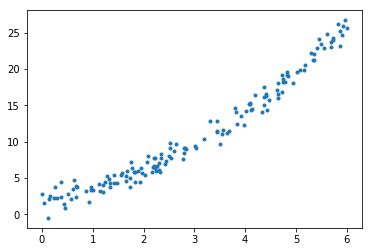

In [5]:
plt.plot(x,y,'.')
plt.show()

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2,include_bias = False)

### degree is the value that you add to your regression.by default it is 2.
## include_bias is the by default True.If the powers are all zeros then it will be True,if not means include_bias should be False.


In [20]:
x_poly = poly_features.fit_transform(x)  ### generates the square of the elements.because degree = 2.

In [21]:
x[0]

array([1.66280185])

In [22]:
x_poly[0]

array([1.66280185, 2.76490998])

In [23]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()


In [24]:
lin_reg.fit(x_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([2.06920868]), array([[1.04761355, 0.49152337]]))

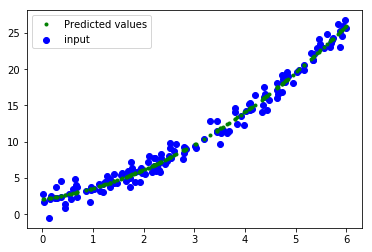

In [26]:
plt.scatter(x,y,color = 'blue',label = "input")
plt.plot(x,lin_reg.predict(x_poly),'.',color = 'g',label = "Predicted values")
plt.legend(loc = "best")
plt.show()

### Applying polynomial regression on Advertising Dataset:

In [28]:
data = pd.read_csv("Advertising.csv")
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [29]:
data.drop("Unnamed: 0",axis = 1,inplace = True)

In [30]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [33]:
### Collecting X and Y:

X = data.iloc[:,0:3].values
Y = data.iloc[:,3:].values

In [35]:
X.shape,Y.shape

((200, 3), (200, 1))

In [36]:
lin = LinearRegression()
lin.fit(X,Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 4)
x_poly = poly.fit_transform(X)
poly.fit(x_poly,Y)
lin2 = LinearRegression()
lin2.fit(x_poly,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
print(lin.coef_)
print(lin.intercept_)

[[ 0.04576465  0.18853002 -0.00103749]]
[2.93888937]


In [40]:
lin.score(X,Y)

0.8972106381789521

In [48]:
X.shape

(200, 3)

In [49]:
Y.shape

(200, 1)

In [51]:
lin2.predict(poly.fit_transform([[230,16,69.2]]))

array([[15.5546667]])

### Ridge ,Lasso and Elastic:


* Underfitting:  If all the elements are fitted with the slope of the line That is underfitting
* Overfitting: If more elements are not fitted with the slope of the line that is underfiting


In [52]:
import numpy as np
import sklearn


In [53]:
from sklearn.linear_model import Ridge


In [54]:
m = 150
x = 6 * np.random.rand(m,1)
y = 0.5 * x**2+x+2+np.random.randn(m,1)

In [55]:
x[1]

array([0.35632679])

In [56]:
y[1]

array([2.49942897])

In [57]:
ridge_reg = Ridge(alpha = 1,solver='cholesky')

In [58]:
help(Ridge)

Help on class Ridge in module sklearn.linear_model.ridge:

class Ridge(_BaseRidge, sklearn.base.RegressorMixin)
 |  Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None)
 |  
 |  Linear least squares with l2 regularization.
 |  
 |  Minimizes the objective function::
 |  
 |  ||y - Xw||^2_2 + alpha * ||w||^2_2
 |  
 |  This model solves a regression model where the loss function is
 |  the linear least squares function and regularization is given by
 |  the l2-norm. Also known as Ridge Regression or Tikhonov regularization.
 |  This estimator has built-in support for multi-variate regression
 |  (i.e., when y is a 2d-array of shape [n_samples, n_targets]).
 |  
 |  Read more in the :ref:`User Guide <ridge_regression>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : {float, array-like}, shape (n_targets)
 |      Regularization strength; must be a positive float. Regularization
 |      improves the conditioning of t

In [59]:
ridge_reg.fit(x,y)


Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001)

In [60]:
ridge_reg.predict([[1.5]])

array([[4.75890895]])

In [63]:
import pandas as pd

In [64]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

In [65]:
boston = load_boston()

In [68]:
boston_df = pd.DataFrame(boston.data,columns = boston.feature_names)

In [70]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [71]:
help(boston_df)

Help on DataFrame in module pandas.core.frame object:

class DataFrame(pandas.core.generic.NDFrame)
 |  DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
 |  
 |  Two-dimensional size-mutable, potentially heterogeneous tabular data
 |  structure with labeled axes (rows and columns). Arithmetic operations
 |  align on both row and column labels. Can be thought of as a dict-like
 |  container for Series objects. The primary pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, or list-like objects
 |  
 |      .. versionchanged :: 0.23.0
 |         If data is a dict, argument order is maintained for Python 3.6
 |         and later.
 |  
 |  index : Index or array-like
 |      Index to use for resulting frame. Will default to RangeIndex if
 |      no indexing information part of input data and no index provided
 |  columns : Index or arr

In [72]:
boston_df['Landprice'] = boston.target

In [74]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Landprice'],
      dtype='object')

In [75]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Landprice
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [76]:
newX = boston_df.drop('Landprice',axis = 1)

In [77]:
newX

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [78]:
newY = boston_df['Landprice']

In [79]:
newY

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Landprice, Length: 506, dtype: float64

In [80]:
from sklearn.model_selection import train_test_split


In [81]:
X_train,X_test,Y_train,Y_test = train_test_split(newX,newY,test_size = 0.3,random_state = 1)

In [83]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [88]:
rr = Ridge(alpha = 0.01,solver = "cholesky")

In [89]:
rr.fit(X_train,Y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001)

In [90]:
train_score = lr.score(X_train,Y_train)

In [91]:
test_score = lr.score(X_test,Y_test)

In [92]:
ridge_train_score = rr.score(X_train,Y_train)

In [93]:
ridge_test_score = rr.score(X_test,Y_test)

In [94]:
print("Train Score with linear regression:",train_score)

Train Score with linear regression: 0.7103879080674731


In [95]:
print("Test Score with linear regression:",test_score)

Test Score with linear regression: 0.7836295385076268


In [96]:
print("Train Score with Ridge regression:",ridge_train_score)
print("Test Score with Ridge regression:",ridge_test_score)

Train Score with Ridge regression: 0.7103864838468883
Test Score with Ridge regression: 0.783799100978662


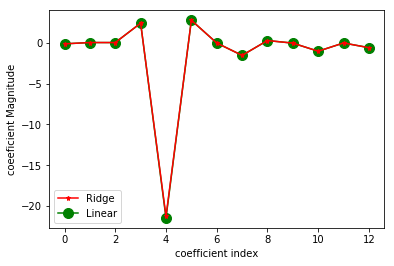

In [99]:
plt.plot(rr.coef_,marker = "*",markersize = 5,color = "red",label = "Ridge",zorder = 7)
plt.plot(lr.coef_,marker = "o",markersize = 10,color = "green",label = "Linear")
plt.xlabel("coefficient index")
plt.ylabel("coeeficient Magnitude")
plt.legend(loc = "best")
plt.show()


In [100]:
from sklearn.linear_model import Lasso


In [101]:
X_train,X_test,Y_train,Y_test = train_test_split(newX,newY,test_size = 0.3,random_state = 1)

In [102]:
lasso= Lasso(alpha = 1)

In [103]:
help(Lasso)

Help on class Lasso in module sklearn.linear_model.coordinate_descent:

class Lasso(ElasticNet)
 |  Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
 |  
 |  Linear Model trained with L1 prior as regularizer (aka the Lasso)
 |  
 |  The optimization objective for Lasso is::
 |  
 |      (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1
 |  
 |  Technically the Lasso model is optimizing the same objective function as
 |  the Elastic Net with ``l1_ratio=1.0`` (no L2 penalty).
 |  
 |  Read more in the :ref:`User Guide <lasso>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : float, optional
 |      Constant that multiplies the L1 term. Defaults to 1.0.
 |      ``alpha = 0`` is equivalent to an ordinary least square, solved
 |      by the :class:`LinearRegression` object. For numerical
 |      reasons, using ``alpha = 0`` with the ``Lasso`` object i

In [104]:
lasso.fit(X_train,Y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [107]:
train_score = lasso.score(X_train,Y_train)
train_score

0.6426270747993064

In [109]:
test_score = lasso.score(X_test,Y_test)
test_score

0.6694782854622285

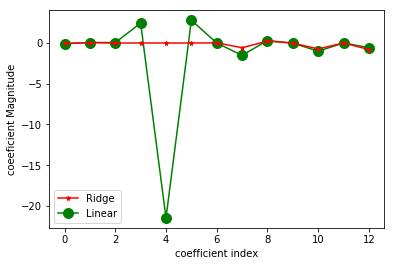

In [110]:
plt.plot(lasso.coef_,marker = "*",markersize = 5,color = "red",label = "Ridge",zorder = 7)
plt.plot(lr.coef_,marker = "o",markersize = 10,color = "green",label = "Linear")
plt.xlabel("coefficient index")
plt.ylabel("coeeficient Magnitude")
plt.legend(loc = "best")
plt.show()


In [112]:
from sklearn.linear_model import ElasticNet

In [113]:
X_train,X_test,Y_train,Y_test = train_test_split(newX,newY,test_size = 0.3,random_state = 1)

In [114]:
elastic = ElasticNet(alpha = 0.1,l1_ratio = 0.5)

elastic.fit(X_train,Y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [116]:
train_score = elastic.score(X_train,Y_train)
train_score

0.6903836943247308

In [117]:
test_score = elastic.score(X_test,Y_test)
test_score

0.7737320729633045

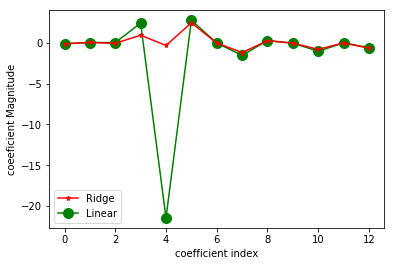

In [118]:
plt.plot(elastic.coef_,marker = "*",markersize = 5,color = "red",label = "Ridge",zorder = 7)
plt.plot(lr.coef_,marker = "o",markersize = 10,color = "green",label = "Linear")
plt.xlabel("coefficient index")
plt.ylabel("coeeficient Magnitude")
plt.legend(loc = "best")
plt.show()